In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:/Users/Hp/OneDrive/Desktop/Diwali Sales Data.csv", encoding = 'unicode_escape')

In [16]:
data.shape

(11239, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Dropping status and unnamed1 coulmns

In [8]:
data.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [9]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# Dropping Null Values

In [11]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
data.shape

(11239, 13)

In [21]:
data.dropna(inplace = True)

In [20]:
pd.isnull(data).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Changing data type

In [23]:
data['Amount'] = data['Amount'].astype('int')

In [24]:
data['Amount'].dtypes

dtype('int32')

In [25]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

Gender

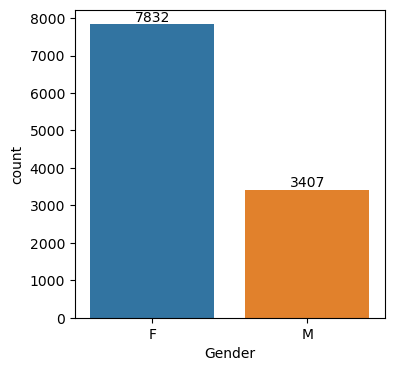

In [29]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.countplot(x = 'Gender', data = data)
for bars in ax.containers:
    ax.bar_label(bars)

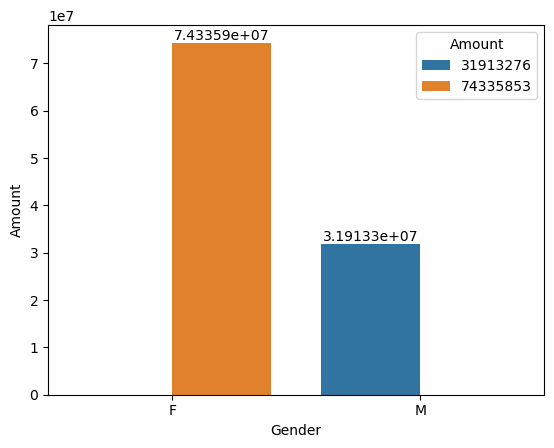

In [36]:
sales_gen = data.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
ax = sns.barplot(x='Gender', y='Amount',
                 hue='Amount', data=sales_gen,
                 errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

From above graphs we can see the most of the buyers are females and even the purchasing power of females are greater than men

# Age

In [40]:
data.columns.values

array(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'], dtype=object)

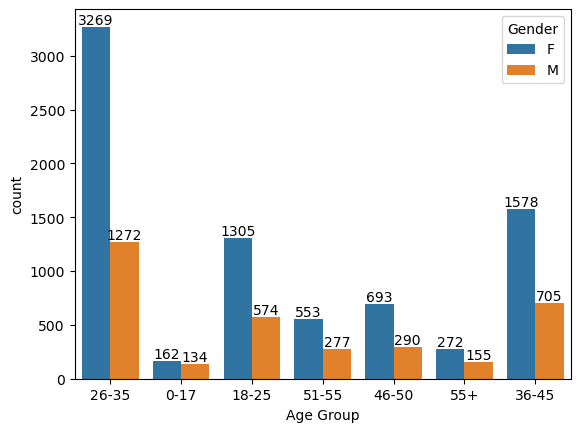

In [37]:
ax = sns.countplot(x = 'Age Group', hue = 'Gender' , data = data)
for bars in ax.containers:
    ax.bar_label(bars)

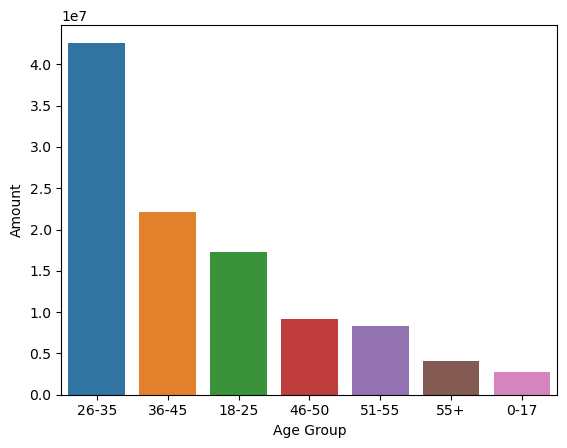

In [42]:
sales_age = data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)

plt.show()

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.

# State

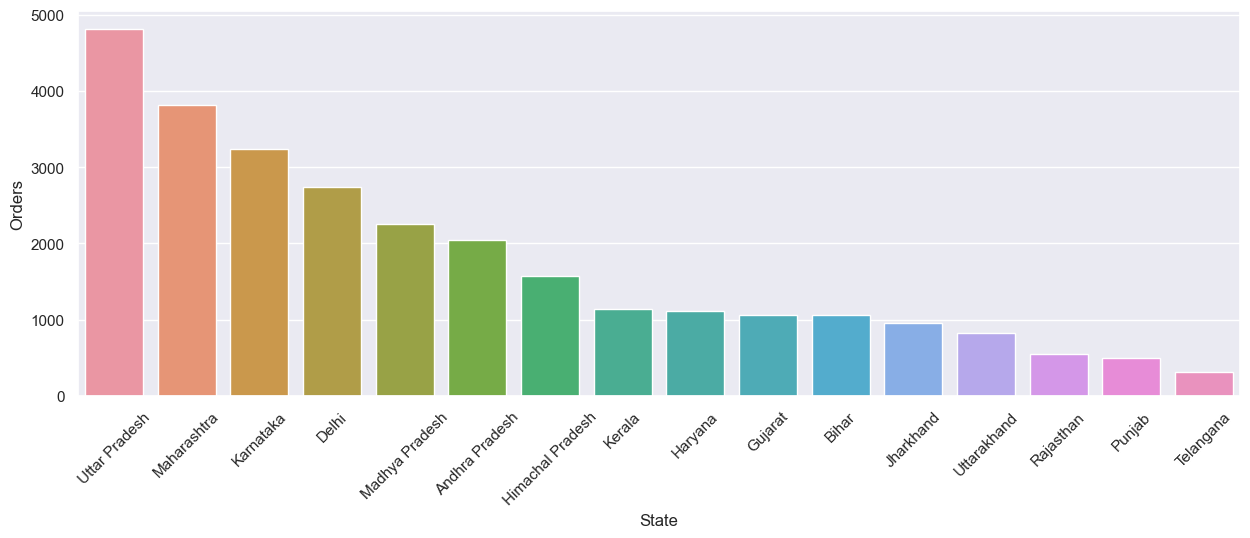

In [47]:
sales_state = data.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)
sns.set(rc= {'figure.figsize':(15,5)})

ax = sns.barplot(x='State', y='Orders', data=sales_state)
ax.tick_params(axis='x', rotation=45)
plt.show()


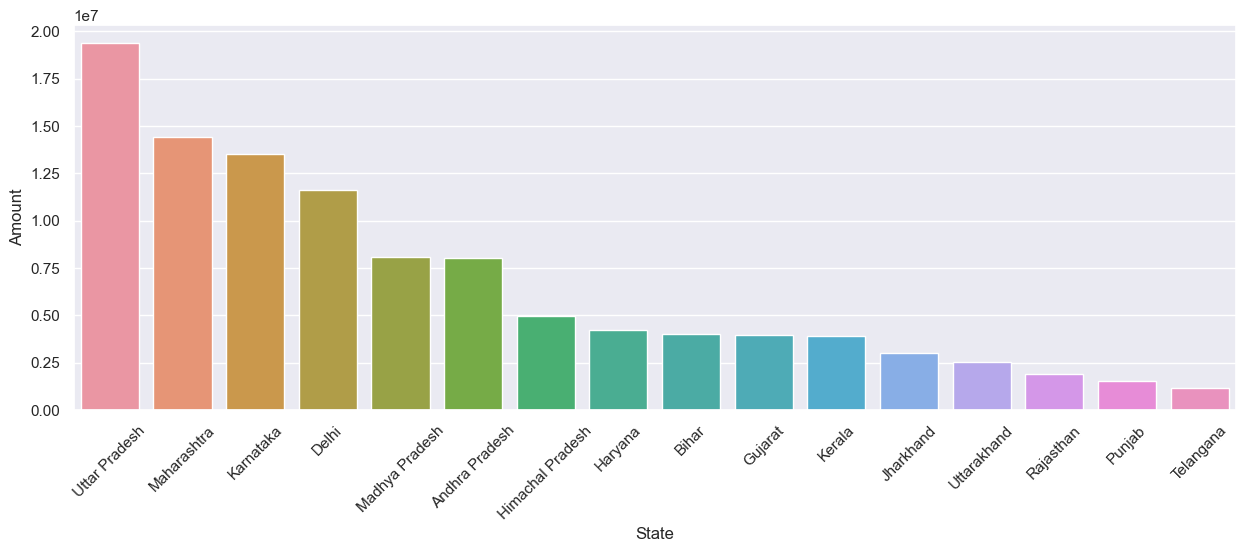

In [48]:
sales_state = data.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc= {'figure.figsize':(15,5)})

ax = sns.barplot(x='State', y='Amount', data=sales_state)
ax.tick_params(axis='x', rotation=45)
plt.show()

From above graphs wwe can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra, Karnataka repectively.

# Marital Status

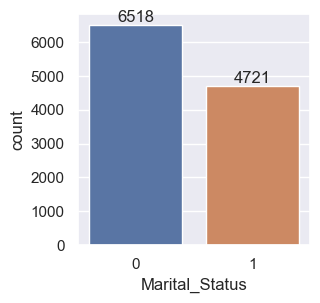

In [57]:
ax = sns.countplot(data = data, x = 'Marital_Status')
sns.set(rc = {'figure.figsize': (4,4)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

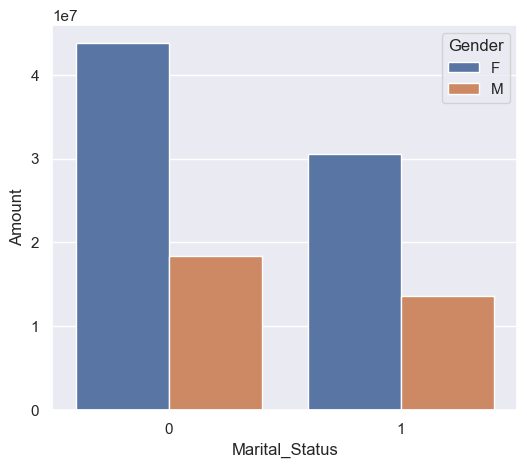

In [58]:
sales_status = data.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc= {'figure.figsize':(6,5)})

ax = sns.barplot(x='Marital_Status', y='Amount', hue = 'Gender', data=sales_status)

plt.show()

From above graphs we can see that most of the buyers are married women and they have high purchasing power.

# Occupation

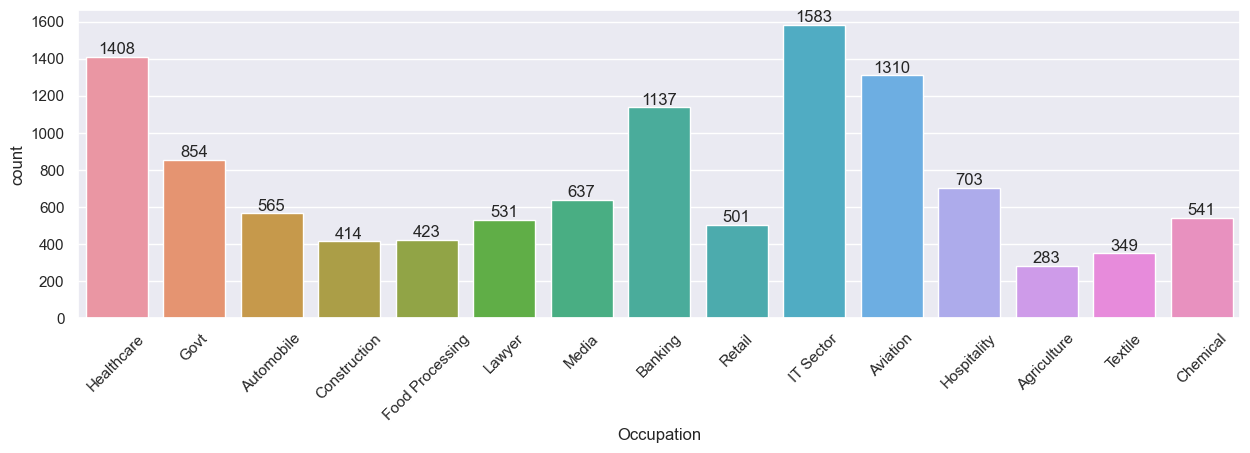

In [60]:
ax = sns.countplot(data = data, x = 'Occupation')
sns.set(rc = {'figure.figsize': (20,4)})
for bars in ax.containers:
    ax.bar_label(bars)
ax.tick_params(axis='x', rotation=45)
plt.show()

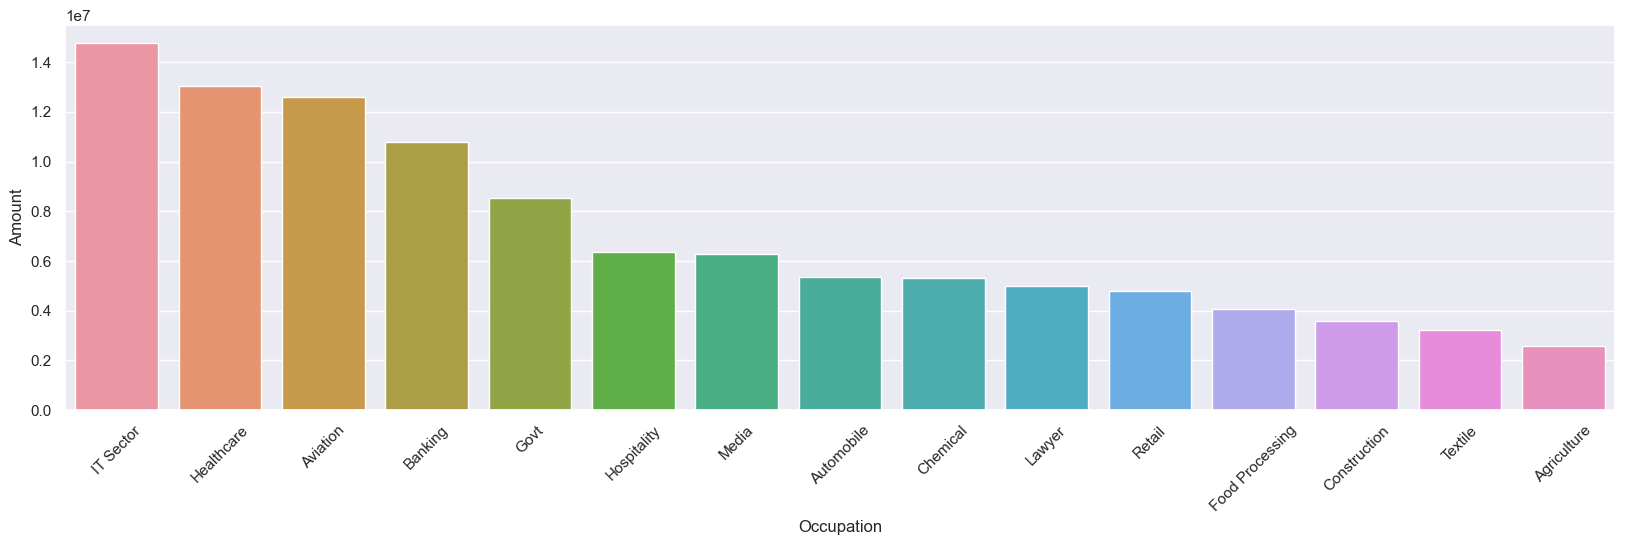

In [63]:
sales_occup = data.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc= {'figure.figsize':(20,5)})

ax = sns.barplot(x='Occupation', y='Amount', data=sales_occup)
ax.tick_params(axis='x', rotation=45)
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare And Aviation Sector

# Product Category

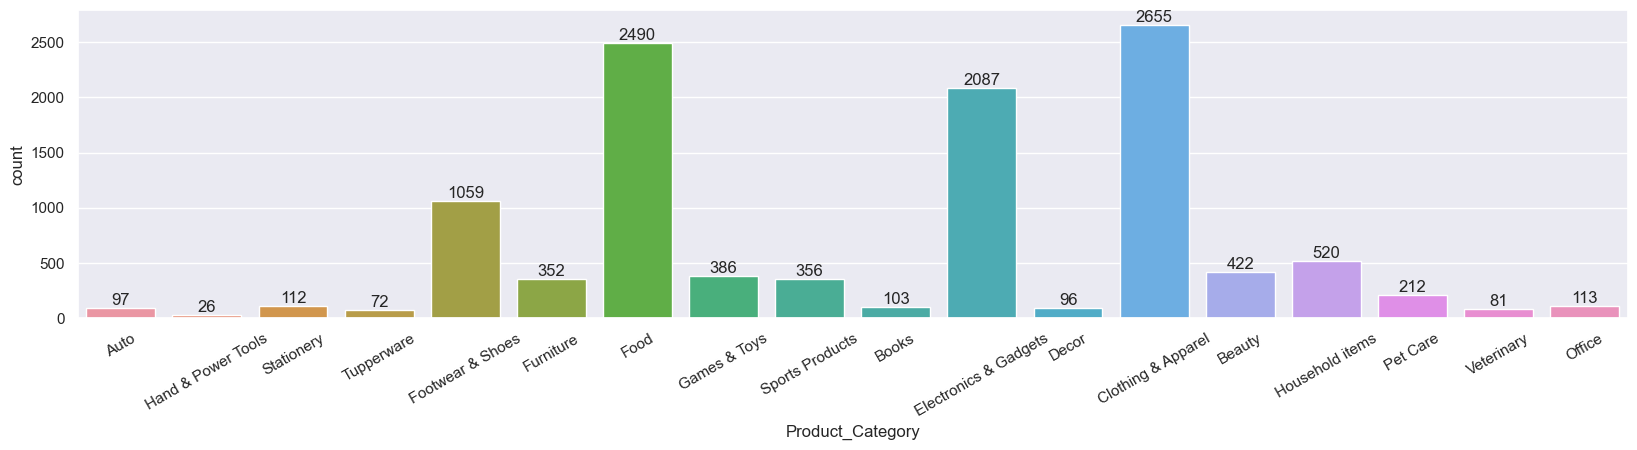

In [70]:
ax = sns.countplot(data = data, x = 'Product_Category')
sns.set(rc = {'figure.figsize': (20,4)})
for bars in ax.containers:
    ax.bar_label(bars)
ax.tick_params(axis='x', rotation=30)
plt.show()

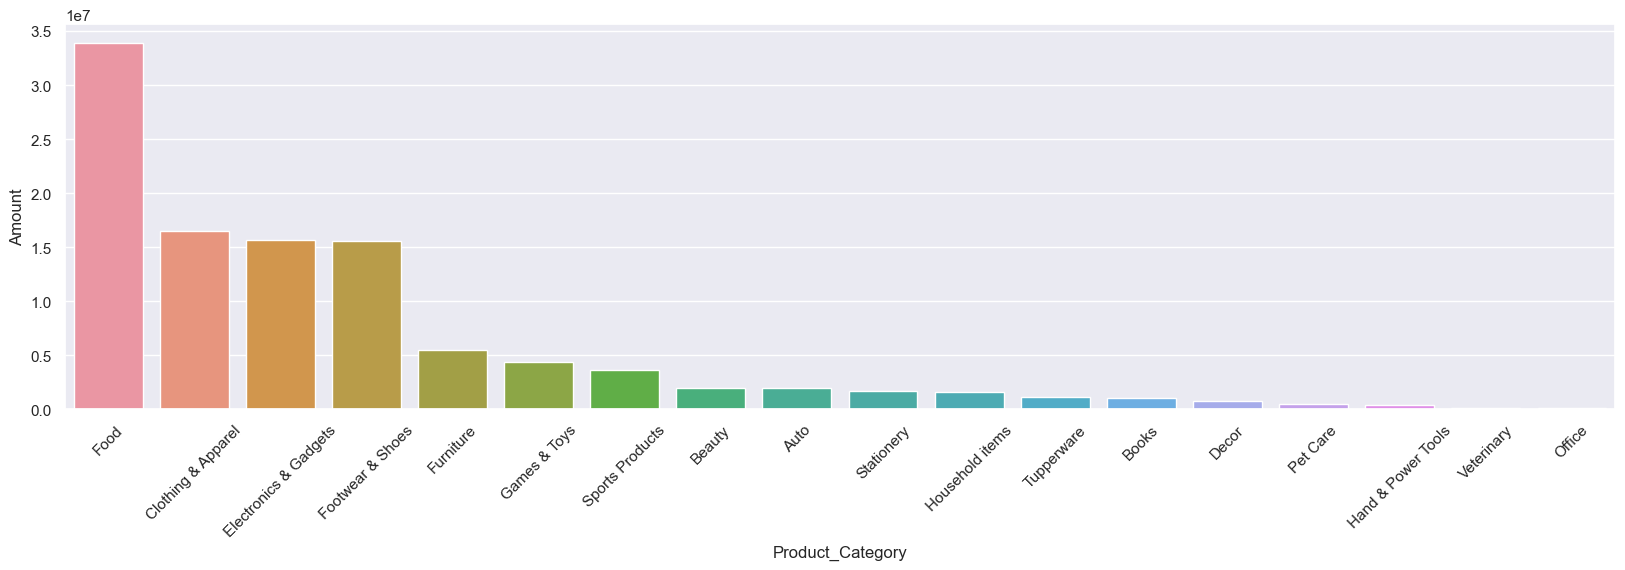

In [72]:
sales_product = data.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc= {'figure.figsize':(20,5)})

ax = sns.barplot(x='Product_Category', y='Amount', data=sales_product)
ax.tick_params(axis='x', rotation=45)
plt.show()

From above graphs we can see that most of the sold products are from Food, Clothing and Electronic Category.